In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from fsl_mrs.utils.plotting import FID2Spec
import fsl_mrs.utils.mrs_io as mrs_io
from fsl_mrs.utils.preproc import nifti_mrs_proc as proc
from fsl_mrs.utils.plotting import plotly_fit
from fsl_mrs.utils import misc
import fsl_mrs.core as core


part = "004"
from pathlib import Path

# Path to the directory 
NOTEBOOK_DIR = Path().resolve()
print(NOTEBOOK_DIR)

#Load Data

off_sup = mrs_io.read_FID(rf'{NOTEBOOK_DIR}/Data_for_fitting/mPress/{part}/off_sup.nii.gz')
off_unsup = mrs_io.read_FID(rf'{NOTEBOOK_DIR}/Data_for_fitting/mPress/{part}/off_unsup.nii.gz')

C:\Users\james\OneDrive - Nexus365\NWS_Code_Data


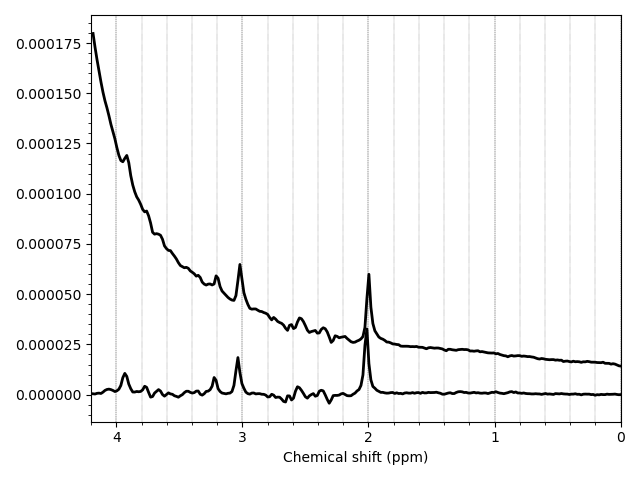

In [2]:
#Phase correct based on the water

off_unsup = proc.shift_to_reference(off_unsup, 4.65, (4.5,4.8))
off_unsup = proc.phase_correct(off_unsup, (4.55, 4.75))


plt.figure()
_ = off_sup.plot(ppmlim= (0,4.2))
_ = off_unsup.plot(ppmlim=(0,4.2))

In [3]:
#Fit Water suppressed reference data

basis_off = mrs_io.read_basis(rf'{NOTEBOOK_DIR}/basis_sets/uzay_svs_mpress_68_off_h2o')
basis_off.remove_fid_from_basis('H2O')

supmrs_off = off_sup.mrs(basis=basis_off)
supmrs_off.check_Basis(repair=True)
supmrs_off.rescaleForFitting()

res_sup_off = supmrs_off.fit(
    ppmlim=(0.2, 4.2),
    baseline='spline, moderate'
)

plotly_fit(supmrs_off, res_sup_off, (0.2, 4.2))

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'cells': {'align': 'left',
                        'fill': {'color': [['#F2F2F2', 'white', '#F2F2F2',
                                           'white', '#F2F2F2', 'white', '#F2F2F2',
                                           'white', '#F2F2F2', 'white', '#F2F2F2',
                                           'white', '#F2F2F2', 'white', '#F2F2F2',
                                           'white', '#F2F2F2', 'white', '#F2F2F2',
                                           'white', '#F2F2F2', 'white', '#F2F2F2',
                                           'white', '#F2F2F2', 'white', '#F2F2F2',
                                           'white', '#F2F2F2', 'white', '#F2F2F2',
                                           'white', '#F2F2F2', 'white', '#F2F2F2',
                                           'white', '#F2F2F2', 'white', '#F2F2F2',
                                           'white', '#F2F2F2', 'white', '#F2F2F2',
                                           'white', '#F2F2F2', 'white', '#F2F2F2',
                                           'white', '#F2F2F2', 'white', '#F2F2F2',
                                           'white', '#F2F2F2', 'white', '#F2F2F2',
                                           'white', '#F2F2F2', 'white', '#F2F2F2',
                                           'white', '#F2F2F2', 'white', '#F2F2F2',
                                           'white', '#F2F2F2', 'white', '#F2F2F2',
                                           'white', '#F2F2F2', 'white', '#F2F2F2',
                                           'white', '#F2F2F2', 'white', '#F2F2F2',
                                           'white']]},
                        'values': [['Ala', 'Asc', 'Asp', 'Cr', 'GABA', 'GPC',
                                   'GSH', 'Gln', 'Glu', 'Ins', 'Lac', 'NAA',
                                   'NAAG', 'PCh', 'PCr', 'PE', 'Scyllo', 'Tau',
                                   'Cr+PCr'], [0.0, 0.09, 0.09, 0.11, 0.04, 0.02,
                                   0.04, 0.01, 0.28, 0.22, 0.01, 0.43, 0.03, 0.02,
                                   0.12, 0.0, 0.01, 0.01, 0.23], [0.005, 0.014,
                                   0.013, 0.008, 0.007, 0.004, 0.005, 0.01, 0.014,
                                   0.012, 0.005, 0.01, 0.005, 0.004, 0.008, 0.018,
                                   0.001, 0.011, 0.005], [999.0, 15.7, 14.2, 7.0,
                                   17.6, 23.0, 12.6, 81.5, 5.1, 5.5, 54.3, 2.3,
                                   14.8, 22.8, 6.6, 999.0, 28.2, 109.1, 2.4], [0.0,
                                   0.39, 0.38, 0.47, 0.18, 0.08, 0.16, 0.05, 1.21,
                                   0.97, 0.04, 1.87, 0.14, 0.09, 0.53, 0.0, 0.02,
                                   0.04, 1.0]]},
              'domain': {'x': [0.0, 0.388], 'y': [0.0, 1.0]},
              'header': {'align': 'left',
                         'fill': {'color': '#41476C'},
                         'font': {'color': 'white'},
                         'values': [<b>Metab</b>, <b>unscaled</b>, <b>CRLB</b>,
                                    <b>%CRLB</b>, <b>/Cr+PCr</b>]},
              'type': 'table',
              'visible': True},
             {'line': {'color': 'rgb(67,67,67)', 'width': 1},
              'mode': 'lines',
              'name': 'data',
              'type': 'scatter',
              'x': {'bdata': ('KLEIOKTPO8AgeyBEnMs7wBpFOFCUxz' ... '4wikJA96N2iDSMQkD6vmqCOI5CQA=='),
                    'dtype': 'f8'},
              'xaxis': 'x',
              'y': {'bdata': ('91jSvePPOb1M0K+8MFYmvKgaGb2o1w' ... '+8u1hMPdA7CjxXR9k8ALd4vH1ZJL0='),
                    'dtype': 'f4'},
              'yaxis': 'y'},
             {'line': {'color': 'rgb(253,59,59)', 'width': 2},
              'mode': 'lines',
              'name': 'model',
              'type': 'scatter',
              'x': {'bdata': ('KLEIOKTPO8AgeyBEnMs7wBpFOFCUxz' ... '4wikJA96N2iDSMQkD6vmqCOI5CQA=='),
                    'dtype': 'f8'},
            

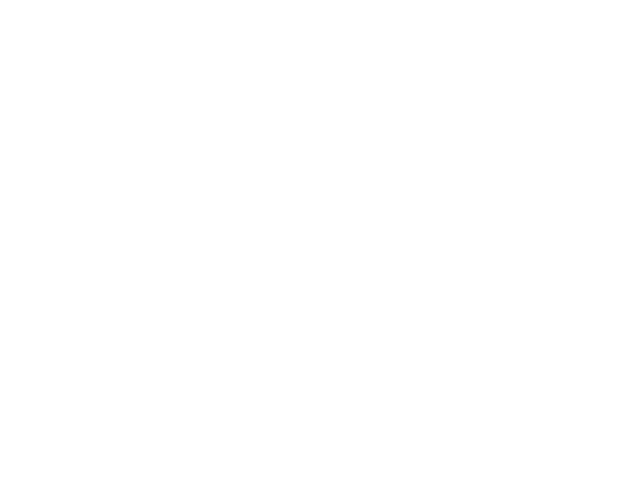

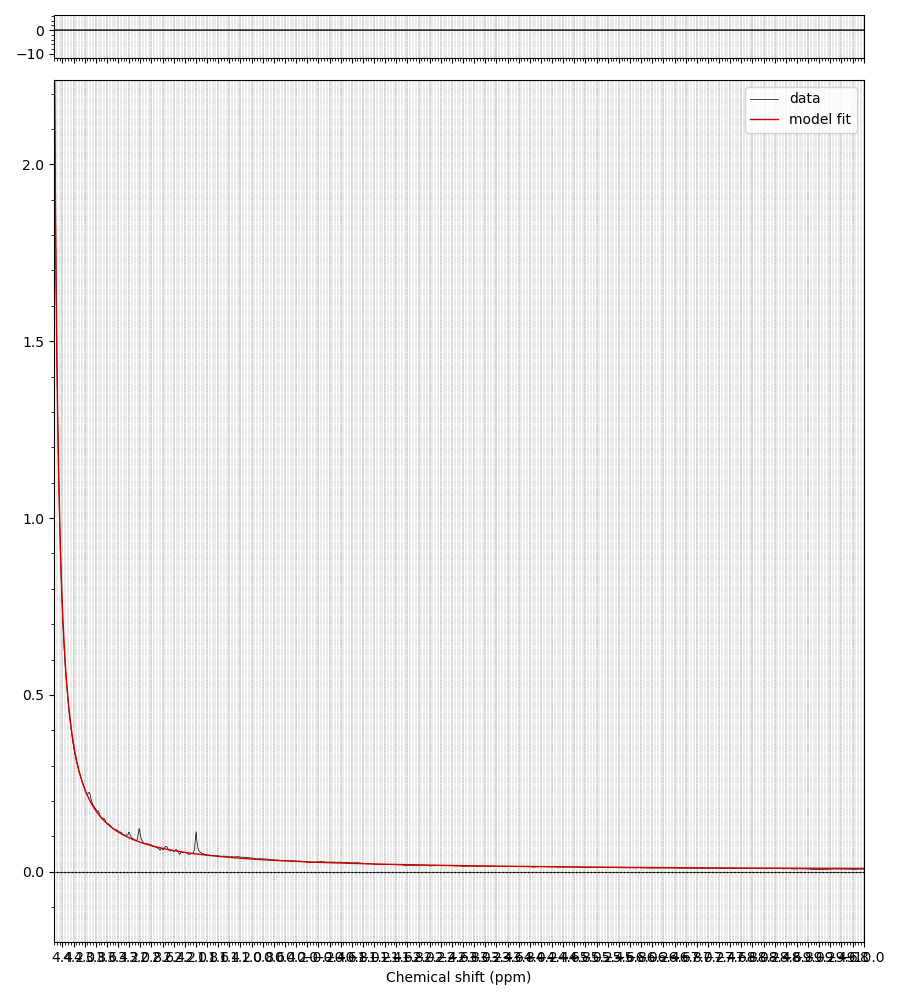

In [4]:
#Fit the water resonance in the unsuppressed data

basis_off = mrs_io.read_basis(rf'{NOTEBOOK_DIR}/basis_sets/uzay_svs_mpress_68_off_h2o')
mrs1 = off_unsup.mrs(basis=basis_off)

mrs1.keep = ['H2O']

mrs1.check_Basis(repair=True)
mrs1.rescaleForFitting()


#Fitted over limited frequency range with no baseline
res_water = mrs1.fit(
    ppmlim = (-10, 4.55),
    baseline = 'off',
    model='voigt'
)



wat_concs = res_water.getConc()[0] / (mrs1.fid_scaling / (mrs1.basis_scaling[0]))

plt.figure()
_ = res_water.plot(mrs1)

In [5]:
#Subtract the fitted water peak from the raw data 


from fsl_mrs.utils import misc


fid_pred = res_water.predictedFID(mrs1, mode='Full', noBaseline=True)
fid_pred  /= mrs1.scaling['FID']

water = off_unsup.copy()
water[:] = fid_pred

metabs = proc.subtract(off_unsup, water)
#proc.subtract has a division by 2, so need to mutiply back by 2
metabs[:] *=2

metabs = proc.shift_to_reference(metabs, 2.01, (1.9, 2.1), figure=False)

Subtracting DIM_EDIT


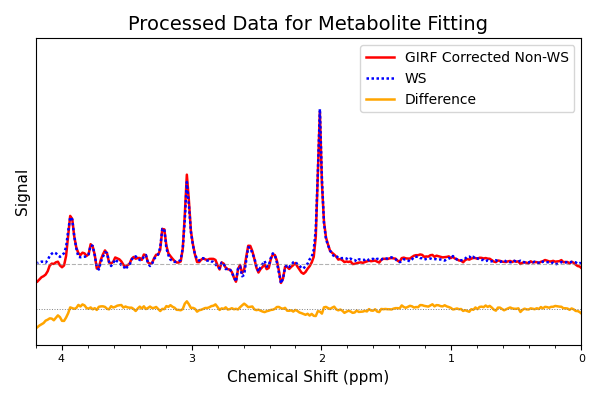

In [6]:
#Creating a nifti_mrs of the right shape for alingment
x = off_sup.copy()
a = x.copy()
b = x.copy()

# 2) Create a singleton 5th dimension
a = core.nifti_mrs.reshape(a, (1,), d5='DIM_EDIT')
b = core.nifti_mrs.reshape(b, (1,), d5='DIM_EDIT')

# 3) Merge them along the 5th dimension → size 2
x = core.nifti_mrs.merge([a, b], dimension='DIM_EDIT')

x[:,:,:,:,0] = metabs[:]
x[:,:,:,:,1] = off_sup[:]



#Alignment of the unsuppressede to the water suppressed data
x = proc.align(x, 'DIM_EDIT', ppmlim=(0.2, 4.2))


y = metabs.copy()
y[:] = x[:,:,:,:,0]
z = metabs.copy()
z[:] = x[:,:,:,:,1]

#Optional saving for later plotting
#y.save(f'{NOTEBOOK_DIR}/Data_for_plotting/mPress_raw/{part}_unsup.nii.gz')
#z.save(f'{NOTEBOOK_DIR}/Data_for_plotting/mPress_raw/{part}_sup.nii.gz')
#x.save(f'{NOTEBOOK_DIR}/Data_for_plotting/mPress_raw/{part}_difference.nii.gz')

plt.figure(figsize=(6,4))
y.plot(ppmlim=(0,4.2))
z.plot(ppmlim=(0,4.2))
x.plot(ppmlim=(0,4.2))

ax = plt.gca()

# Recolor lines
lines = ax.get_lines()

diff_line = lines[2]
xdata = diff_line.get_xdata()
ydata = diff_line.get_ydata()

#Multiply by 2 due to proc.subtract reasons and then vertically offset
ydata_new = (2 * ydata - 1e-5)

# Update the line
diff_line.set_ydata(ydata_new)

lines[1].set_color('blue')
lines[0].set_color('red')
lines[2].set_color('orange')

lines[2].set_linewidth(1.8)
lines[1].set_linewidth(1.8)
lines[0].set_linewidth(1.8)

lines[1].set_linestyle((0,(1,1)))

ax.legend(
    [lines[0], lines[1], lines[2]],
    ['GIRF Corrected Non-WS', 'WS', 'Difference'],
    fontsize=10
)

# Remove y ticks and set label
ax.set_yticks([])
ax.axhline(-1e-5, color='gray', linestyle=':', linewidth=0.7)

#ax.text(ax.get_xlim()[0] - 0.1, 0, '0', va='center', ha='right', fontsize=10, color='gray')
ax.set_ylim(-0.000018, 0.00005)
ax.set_ylabel('Signal', fontsize=11)
ax.set_xlabel("Chemical Shift (ppm)", fontsize=11)
ax.tick_params(axis='x', labelsize=8)
ax.axhline(0, color='gray', linestyle='--', linewidth=0.8, alpha=0.6)
ax.set_title('Processed Data for Metabolite Fitting', fontsize = 14)
#ax.set_title('HLSVD Removal of Residual Water', fontsize = 14)
ax.grid(False)  # turns all grids off first
ax.xaxis.grid(False, which='major')
ax.xaxis.grid(False, which='minor')

plt.tight_layout()
plt.show()


In [7]:
#Fit the water unsuppressed data

metabs[:] = x[:,:,:,:,0]


basis_nowater = mrs_io.read_basis(rf'{NOTEBOOK_DIR}/basis_sets/uzay_svs_mpress_68_off_h2o')
basis_nowater.remove_fid_from_basis('H2O')

unsupmrs_off = metabs.mrs(basis=basis_nowater)
unsupmrs_off.check_Basis(repair=True)
unsupmrs_off.rescaleForFitting()

unsupmrs_off.fid_scaling = supmrs_off.fid_scaling


res_unsup_off = unsupmrs_off.fit(
    ppmlim=(0.2, 4.2),
    baseline='spline, moderate',
    model='voigt'
)

plotly_fit(unsupmrs_off, res_unsup_off, (0.2, 4.2))

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'cells': {'align': 'left',
                        'fill': {'color': [['#F2F2F2', 'white', '#F2F2F2',
                                           'white', '#F2F2F2', 'white', '#F2F2F2',
                                           'white', '#F2F2F2', 'white', '#F2F2F2',
                                           'white', '#F2F2F2', 'white', '#F2F2F2',
                                           'white', '#F2F2F2', 'white', '#F2F2F2',
                                           'white', '#F2F2F2', 'white', '#F2F2F2',
                                           'white', '#F2F2F2', 'white', '#F2F2F2',
                                           'white', '#F2F2F2', 'white', '#F2F2F2',
                                           'white', '#F2F2F2', 'white', '#F2F2F2',
                                           'white', '#F2F2F2', 'white', '#F2F2F2',
                                           'white', '#F2F2F2', 'white', '#F2F2F2',
                                           'white', '#F2F2F2', 'white', '#F2F2F2',
                                           'white', '#F2F2F2', 'white', '#F2F2F2',
                                           'white', '#F2F2F2', 'white', '#F2F2F2',
                                           'white', '#F2F2F2', 'white', '#F2F2F2',
                                           'white', '#F2F2F2', 'white', '#F2F2F2',
                                           'white', '#F2F2F2', 'white', '#F2F2F2',
                                           'white', '#F2F2F2', 'white', '#F2F2F2',
                                           'white', '#F2F2F2', 'white', '#F2F2F2',
                                           'white']]},
                        'values': [['Ala', 'Asc', 'Asp', 'Cr', 'GABA', 'GPC',
                                   'GSH', 'Gln', 'Glu', 'Ins', 'Lac', 'NAA',
                                   'NAAG', 'PCh', 'PCr', 'PE', 'Scyllo', 'Tau',
                                   'Cr+PCr'], [0.0, 0.1, 0.05, 0.14, 0.05, 0.02,
                                   0.04, 0.0, 0.3, 0.21, 0.01, 0.42, 0.04, 0.02,
                                   0.11, 0.06, 0.01, 0.01, 0.25], [0.006, 0.016,
                                   0.015, 0.009, 0.009, 0.005, 0.005, 0.012, 0.017,
                                   0.014, 0.006, 0.011, 0.005, 0.005, 0.009, 0.022,
                                   0.002, 0.012, 0.006], [999.0, 16.7, 28.6, 6.4,
                                   16.7, 30.5, 15.1, 999.0, 5.5, 6.6, 104.2, 2.5,
                                   13.3, 23.7, 8.6, 35.7, 32.2, 85.1, 2.6], [0.0,
                                   0.4, 0.21, 0.57, 0.22, 0.07, 0.14, 0.0, 1.21,
                                   0.86, 0.02, 1.71, 0.16, 0.09, 0.43, 0.24, 0.02,
                                   0.06, 1.0]]},
              'domain': {'x': [0.0, 0.388], 'y': [0.0, 1.0]},
              'header': {'align': 'left',
                         'fill': {'color': '#41476C'},
                         'font': {'color': 'white'},
                         'values': [<b>Metab</b>, <b>unscaled</b>, <b>CRLB</b>,
                                    <b>%CRLB</b>, <b>/Cr+PCr</b>]},
              'type': 'table',
              'visible': True},
             {'line': {'color': 'rgb(67,67,67)', 'width': 1},
              'mode': 'lines',
              'name': 'data',
              'type': 'scatter',
              'x': {'bdata': ('KLEIOKTPO8AgeyBEnMs7wBpFOFCUxz' ... '4wikJA96N2iDSMQkD6vmqCOI5CQA=='),
                    'dtype': 'f8'},
              'xaxis': 'x',
              'y': {'bdata': ('N28FQRtQEkFUyxFBnUgRQQVHEUGqbh' ... 'hBZNkHQSFPCEGACgdB68AHQXleB0E='),
                    'dtype': 'f4'},
              'yaxis': 'y'},
             {'line': {'color': 'rgb(253,59,59)', 'width': 2},
              'mode': 'lines',
              'name': 'model',
              'type': 'scatter',
              'x': {'bdata': ('KLEIOKTPO8AgeyBEnMs7wBpFOFCUxz' ... '4wikJA96N2iDSMQkD6vmqCOI5CQA=='),
                    'dtype': 'f8'},
             

Subtracting DIM_EDIT


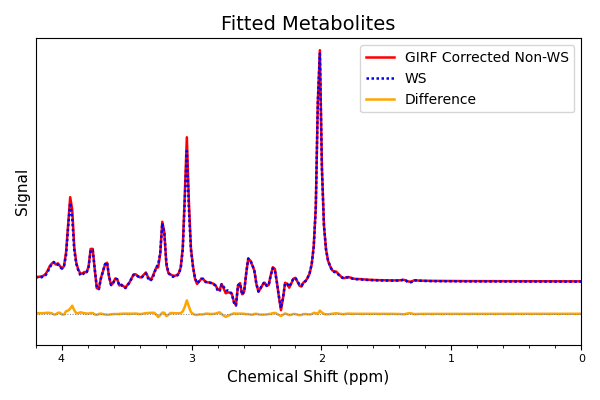

In [8]:
x = off_sup.copy()
a = x.copy()
b = x.copy()

# 2) Create a singleton 5th dimension
a = core.nifti_mrs.reshape(a, (1,), d5='DIM_EDIT')
b = core.nifti_mrs.reshape(b, (1,), d5='DIM_EDIT')

# 3) Merge them along the 5th dimension → size 2
x = core.nifti_mrs.merge([a, b], dimension='DIM_EDIT')

#appropriate scale factor
sf2 = supmrs_off.fid_scaling / unsupmrs_off.fid_scaling

x[:,:,:,:,0] = res_unsup_off.predictedFID(unsupmrs_off, noBaseline=True)
x[:,:,:,:,1] = res_sup_off.predictedFID(supmrs_off, noBaseline=True) / sf2

x = proc.align(x, 'DIM_EDIT', ppmlim=(0.2, 4.2))


y = metabs.copy()
y[:] = x[:,:,:,:,0]
z = metabs.copy()
z[:] = x[:,:,:,:,1]

#Optional saving for later plotting
#y.save(f'{NOTEBOOK_DIR}/Data_for_plotting/mPress_fitted/{part}_unsup.nii.gz')
#z.save(f'{NOTEBOOK_DIR}/Data_for_plotting/mPress_fitted/{part}_sup.nii.gz')
#x.save(f'{NOTEBOOK_DIR}/Data_for_plotting/mPress_fitted/{part}_difference.nii.gz')

plt.figure(figsize=(6,4))
y.plot(ppmlim=(0,4.2))
z.plot(ppmlim=(0,4.2))
x.plot(ppmlim=(0,4.2))

ax = plt.gca()

# Recolor lines
lines = ax.get_lines()

diff_line = lines[2]
xdata = diff_line.get_xdata()
ydata = diff_line.get_ydata()

# Apply your modifications:
#   1) multiply by 2
#   2) offset downward by 1e-5
ydata_new = (2 * ydata - 5)

# Update the line
diff_line.set_ydata(ydata_new)

lines[1].set_color('blue')
lines[0].set_color('red')
lines[2].set_color('orange')

lines[2].set_linewidth(1.8)
lines[1].set_linewidth(1.8)
lines[0].set_linewidth(1.8)

lines[1].set_linestyle((0,(1,1)))

ax.legend(
    [lines[0], lines[1], lines[2]],
    ['GIRF Corrected Non-WS', 'WS', 'Difference'],
    fontsize=10
)

# Remove y ticks and set label
ax.set_yticks([])
ax.axhline(-5, color='gray', linestyle=':', linewidth=0.7)

#ax.text(ax.get_xlim()[0] - 0.1, 0, '0', va='center', ha='right', fontsize=10, color='gray')
ax.set_ylim(-10, 40)
ax.set_ylabel('Signal', fontsize=11)
ax.set_xlabel("Chemical Shift (ppm)", fontsize=11)
ax.tick_params(axis='x', labelsize=8)
#ax.axhline(0, color='gray', linestyle='--', linewidth=0.8, alpha=0.6)
ax.set_title('Fitted Metabolites', fontsize = 14)
#ax.set_title('HLSVD Removal of Residual Water', fontsize = 14)
ax.grid(False)  # turns all grids off first
ax.xaxis.grid(False, which='major')
ax.xaxis.grid(False, which='minor')

plt.tight_layout()
plt.show()

In [9]:
#Comparate metabolite ratios

import pandas as pd
pd.set_option('display.float_format', '{:.6f}'.format)

metab_conc_unsup = res_unsup_off.getConc() / (unsupmrs_off.fid_scaling / (unsupmrs_off.basis_scaling[0]))
metab_conc_sup = res_sup_off.getConc() / (supmrs_off.fid_scaling / (supmrs_off.basis_scaling[0]))


df = pd.DataFrame()
df.loc[:, 'metabs_unsup'] = pd.Series(metab_conc_unsup, res_unsup_off.metabs)
df.loc[:, 'metabs_sup'] = pd.Series(metab_conc_sup, res_sup_off.metabs)



# Add combined metabolite pools


df.loc['H2O', 'metabs_unsup'] = wat_concs
df.loc['H2O', 'metabs_sup'] = wat_concs

df.loc['tNAA'] = df.loc['NAA'] + df.loc['NAAG']
df.loc['tCho'] = df.loc['GPC'] + df.loc['PCh']
df.loc['Glx']  = df.loc['Glu'] + df.loc['Gln']

if 'Cr+PCr' in df.index:
    df.rename(index={'Cr+PCr': 'tCr'}, inplace=True)
df =df.div(df.loc['H2O',:])
df["unsup/sup"] = df["metabs_unsup"] / df["metabs_sup"]

print(df)

#Optional save
#df.to_csv(rf'{NOTEBOOK_DIR}/Data_for_plotting/concetration_ratios/mPress/{part}.csv', index=True)

        metabs_unsup  metabs_sup  unsup/sup
Ala         0.000000    0.000000        NaN
Asc         0.000167    0.000152   1.097822
Asp         0.000086    0.000149   0.577738
Cr          0.000238    0.000183   1.298958
GABA        0.000090    0.000072   1.256835
GPC         0.000028    0.000032   0.877713
GSH         0.000059    0.000061   0.978055
Gln         0.000000    0.000021   0.000000
Glu         0.000507    0.000470   1.078945
Ins         0.000360    0.000377   0.953166
Lac         0.000010    0.000016   0.613285
NAA         0.000717    0.000726   0.987947
NAAG        0.000069    0.000056   1.232691
PCh         0.000038    0.000033   1.126199
PCr         0.000181    0.000205   0.884193
PE          0.000103    0.000000        inf
Scyllo      0.000009    0.000009   1.015084
Tau         0.000024    0.000016   1.490079
tCr         0.000419    0.000388   1.079814
H2O         1.000000    1.000000   1.000000
tNAA        0.000786    0.000781   1.005357
tCho        0.000066    0.000066